In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas_profiling import ProfileReport

In [82]:
df=pd.read_csv("C:\\Users\\arpan\\ML models\\DT_HeartDisease\\processed.cleveland.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Source:
Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.

### Since there are no column names, let's replace the column numbers with the follwing column names:
Attribute Information:

Only 14 attributes used:
- <b> age
- **sex**, (1 = male; 0 = female) 
- **cp** ,
   chest pain type

   Value 1: typical angina
  
   Value 2: atypical angina
   
   Value 3: non-anginal pain
   
   Value 4: asymptomatic
   
   
- **restbps**,   resting blood pressure (in mm Hg on admission to the hospital)
- **chol**, serum cholestoral in mg/dl
- **fbs**, (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg**, resting electrocardiographic results

   Value 0: normal
   
   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation  or depression of > 0.05 mV)
   
   Value 2: showing probable or definite left ventricular hypertrophy by Estes'    criteria
   
   
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina (1 = yes; 0 = no)
- **oldpeak**,  ST depression induced by exercise relative to rest
- **slope**,   the slope of the peak exercise ST segment

     Value 1: upsloping

     Value 2: flat

     Value 3: downsloping
     

- **ca**,  number of major vessels (0-3) colored by flourosopy
- **thal**,  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **hd (the predicted attribute)**, diagnosis of heart disease


In [83]:
df.columns=["age","sex","cp","restbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]

In [4]:
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [85]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [86]:
df.loc[(df["ca"]=="?")|(df["thal"]=="?")]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)

303

since 2% data is missing value we can remove that **303-6=297** . Thats a plenty of data for classification

In [87]:
df_no_missing=df.loc[(df["ca"]!="?")&(df["thal"]!="?")]
df_no_missing.shape

(297, 14)

In [88]:
df_no_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [89]:
df_no_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [90]:
X=df_no_missing.drop("hd",axis=1)
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [91]:
y=df_no_missing["hd"].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

age : **Float**, sex : **category**, cp : **category**, restbp : **Float**, chol : **Float**,  fbs : **category**, restcg : **category**, thalch : **Float**, exang : **category**,
oldpeak : **Float**, slope : **category**, ca : **Float**, thal : **Category**

In [16]:
X.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [92]:
X["cp"].unique()

array([1., 4., 3., 2.])

In [93]:
pd.get_dummies(X,columns=["cp"]).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [94]:
X_encoded=pd.get_dummies(X,columns=["cp","restecg","slope","thal"])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [95]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [96]:
y_new=y>0

In [97]:
y[y_new]=1

In [98]:
y.unique()

array([0, 1], dtype=int64)

We have finally finished formatting the data for making a **Classification Tree**, so let's do it !!!

##  Build a preliminary classification tree

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

In [100]:
X_train.shape

(222, 22)

In [101]:
X_test.shape

(75, 22)

In [102]:
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)


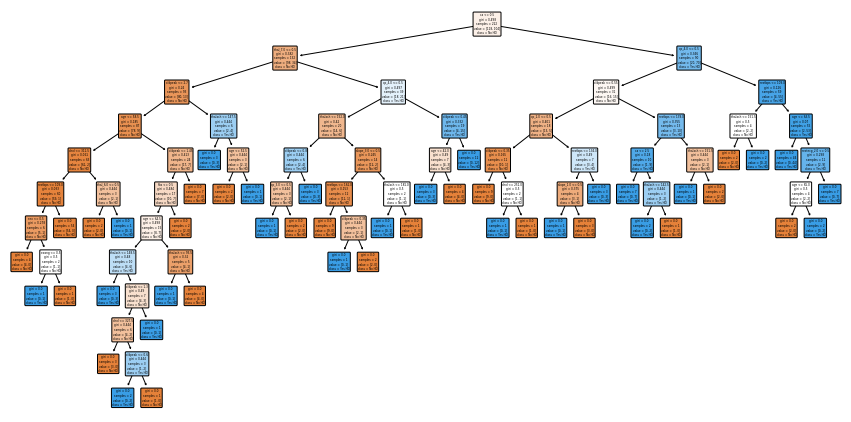

In [103]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_encoded.columns);

## Confusion matrix on testing data

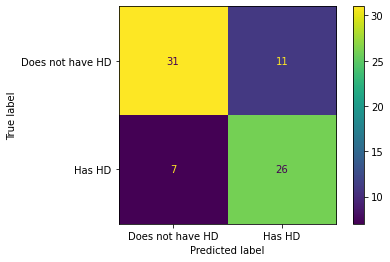

In [104]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Does not have HD","Has HD"])

In [107]:
acc=(31+26)/(31+11+7+26)

In [108]:
acc

0.76

In the confusion matrix,we see that of **31+11=42** people **did not have Heart disease, 31(73%)** were correctly classfied. And of the **7+26=33** people that have **Heart Disease,26(78%)** were correctly classified. Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset.So let's prune the tree. Pruning,in theory,should solve the overfitting problem and give us better results


## Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **training dataset**, and there are a lot of parameters like max_depth and min_samples, that are designed to reduce overfitting. However pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy with **testing dataset**

Pruning a decision tree is all about finding the right value for the pruning parameter,alpha, which controls how little or how much pruning happens.One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values.We'll do this for both the **Training dataset** and **testing dataset**

First,let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha.**NOTE:** We omit the maximum value for alpha with __ccp_alphas=ccp_alphas[:-1]__ because it would prune all leaves,leaving us with only a root instead of a true

In [112]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas=path.ccp_alphas   #extract different values for alpha
ccp_alphas=ccp_alphas[:-1] #exclude the maximum value for alpha

clf_dts=[] #create an array that we will put decison trees into

#now create one decison tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using tha **Training Dataset** and the **Testing Dataset** as a function of alpha

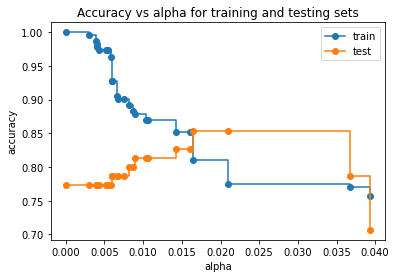

In [113]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In the above graph we see that the accuracy for the **Testing dataset** hits its maximum value when __alpha__ is about **0.016**. After this value for alpha the accuracy of the **Training dataset** drops off and that suggests we should set **ccp_alpha=0.016**.

**NOTE** : when we apply **Cost Complexity Pruning** to a classification tree , values for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast values for alpha for a **Regression Tree** can be much larger since the sum of squares of residuals can,in the theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we know we used the best **Training dataset** and **Testing dataset**. so we will use **K-Fold cross validation**. So that's what we're going to do now, and we'll do it with the **cross_val_score()** function.

## Cost Complexity Pruning Part 2: Cross Validation for finding the best Alpha

Using alpha value **0.016**

<AxesSubplot:xlabel='tree'>

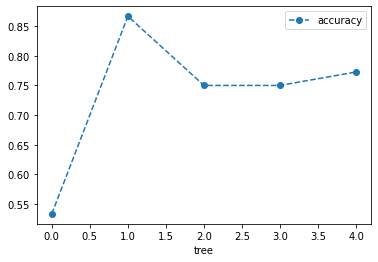

In [114]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)  #create the tree with ccp_alpha=0.016

## now use 5-fold cross validation create 5 different training and testing datasets that 
## are then used to train and test the tree.
## NOTE: We use 5-fold because we don't have tons of data...
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
df=pd.DataFrame(data={"tree":range(5),"accuracy":scores})
df.plot(x="tree",y="accuracy",marker="o",linestyle="--")

The graph above shows that using different **Training** and **Testing** data with same **alpha** resulted in different accuracies, suggesting that **alpha** is sensitive to the datasets.So,insted of picking a single training dataset and testing dataset lets use **Cross validation** to find the optimal value for **ccp_alpha**

<AxesSubplot:xlabel='alpha'>

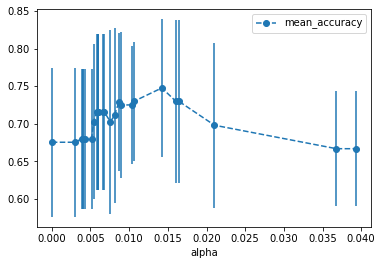

In [115]:
## create an array to store the results of each fold during cross validation
alpha_loop_values=[]

## For each candidate value for alpha we will run 5-fold CV
## Then we will store the mean and SD of the scores(accuracy) for each call
## to cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
## now we can draw a graph of the means and the SD of the scores
## for each candidate value for alpha
alpha_results=pd.DataFrame(alpha_loop_values,columns=["alpha","mean_accuracy","std"])
alpha_results.plot(x="alpha",y="mean_accuracy",yerr="std",marker="o",linestyle="--")

Using cross validation we can see that instead of setting **ccp_alpha=0.016**, we need to set it to something closer to **0.014**. We can find the exact value with:

In [116]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.675556,0.099330
1,0.002953,0.675556,0.099330
2,0.003861,0.680000,0.093173
3,0.004054,0.680000,0.093173
4,0.004095,0.680000,0.093173
5,0.004294,0.680000,0.093173
6,0.005148,0.680000,0.093173
7,0.005413,0.702626,0.103065
8,0.005788,0.716263,0.103916
9,0.006006,0.716263,0.103916


In [117]:
ideal_ccp_alpha=alpha_results.iloc[[20]]

In [118]:
ideal_ccp_alpha

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [119]:
ideal_ccp_alpha.drop(columns=["mean_accuracy","std"],axis=1,inplace=True)

C:\Users\arpan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
ideal_ccp_alpha

,alpha
20,0.014225


In [121]:
ideal_ccp_alpha=ideal_ccp_alpha.squeeze()

In [122]:
ideal_ccp_alpha   

0.014224751066856332

In [123]:
ideal_ccp_alpha=round(ideal_ccp_alpha,4)

In [124]:
ideal_ccp_alpha  ## final alpha value

0.0142

## Building,Evaluating,Drawing and Interpreting the Final Classification Tree

In [125]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

Now let's draw another confusion matrix to see if the pruned tree does better.

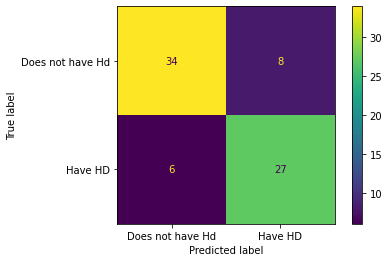

In [126]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=["Does not have Hd","Have HD"])

In [127]:
acc=(34+27)/(34+27+8+6)

In [128]:
acc                   ## better than previous after pruning..  Previous was 76% .. now it's 81.3%

0.8133333333333334

In the confusion matrix,we see that of **34+8=42** people **did not have Heart disease, 34(80%)** were correctly classfied.Previous was **73%**. And of the **6+27=33** people that have **Heart Disease, 27(81%)** were correctly classified.Previous was **78%**. Improvement in the tree after pruning...


### Final Pruned Tree

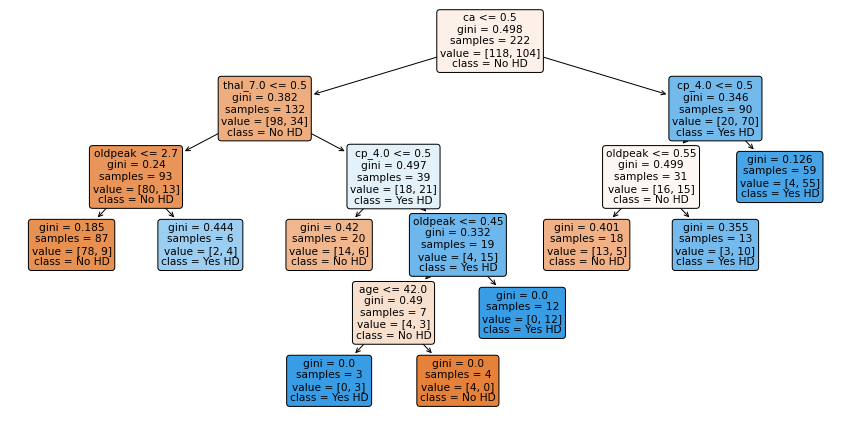

In [132]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_encoded.columns);